## IMPORTS

In [2]:
# \\  -------- IMPORTS -------- //

from ast import Return
from codecs import getdecoder
from pkgutil import get_data
from typing import List
from unicodedata import name
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

#import backtrader as bt
#import talib

# cyclical imports
from statsmodels.tsa.filters.hp_filter import hpfilter


# for outliers in data cleaning
from scipy import stats

# Data API
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

df = 0
df1 = 0

end = dt.datetime.now()  # end date is now
start = dt.datetime(1980, 1, 1)   # start date 

## IMPORT DATA

In [3]:
# economic metrics from FRED Data

# labour force participation rate 
# RATES = US 'DFF'

#demographic data 

#risk free rate
riskfreerate = ['DGS3MO'] # 3 month t bills

# US
USGDP = ['GDP'] # GDP QUARTERLY 
USGDPQQ = ['A191RL1Q225SBEA'] # USGDPQQ
USCPI = ['CPIAUCSL'] # CPI monthly
USCPIMM = ['CORESTICKM159SFRBATL'] # CPI MOM
USUR = ['U2RATE'] # UNEMP monthly

USINTR = ['DFF'] # US INTEREST RATE

# EURO
EUGDP = ['CLVMEURSCAB1GQEA19'] # GDP QUARTERLY
EUCPI = ['CP0000EZ19M086NEST'] # CPI monthy
EUUR = ['LRHUTTTTEUM156S'] # UNEMP monthly
#EconomiclistRatesEURO = ['IRLTLT01DEM156N']
#EconomiclistEconomicsEURO = ['NGDPRSAXDCDEQ', 'DEUCPIALLMINMEI', 'LMUNRRTTDEM156S', 'DEUCPIENGAINMEI', 'LFWA64TTDEQ647S']

EUINTR = ['ECBDFR'] #EU INTEREST RATE

# UK
UKGDP = ['CLVMNACSCAB1GQUK'] # GDP QUARTERLY
UKCPI = ['GBRCPIALLMINMEI'] # CPI monthy
UKUR = ['AURUKM'] # UNEMP monthly
#EconomiclistRatesUK = ['IRLTLT01GBM156N']
#EconomiclistEconomicsUK = ['GBRCPIALLMINMEI', 'UKNGDP', 'CPALTT01GBM659N', 'LFWA64TTGBQ647S', 'LRHUTTTTGBM156S']

GBINTR = ['IUDSOIA'] # GB INTEREST RATE

# NZD
NZGDP = ['NAEXKP01NZQ189S'] # GDP QUARTERLY
NZCPI = ['NZLCPIALLQINMEI'] # CPI quarterly
NZUR = ['LRUNTTTTNZQ156S'] # UNEMP quarterly
#EconomiclistRatesEURO = ['IR3TBB01NZM156N', 'NZLCPIALLQINMEI', 'IRLTLT01NZM156N']
#EconomiclistEconomicsEURO = ['LRUNTTTTNZQ156S']

NZINTR = ['IR3TBB01NZM156N'] # NEW ZEALAND INTEREST RATE

#AUD
AUDGDP = ['NGDPRSAXDCAUQ'] # GDP QUARTERLY
AUDCPI = ['CPALTT01AUQ659N'] # CPI quarterly
AUDUR = ['LRUNTTTTAUM156S'] # UNEMP monthly
#EconomiclistRatesAUD = ['IR3TBB01AUQ156N', 'NGDPRSAXDCAUQ', 'AUSCPIALLQINMEI', 'IRLTLT01AUM156N', 'IR3TIB01AUM156N', 'INTDSRAUM193N']
#EconomiclistEconomicsAUD = ['LRHUTTTTAUM156S']
AUINTR = ['IR3TBB01AUM156N'] # AU INTEREST RATES
#CAD
CADGDP = ['NAEXKP01CAQ189S'] # GDP QUARTERLY
CADCPI = ['CPALCY01CAM661N'] # CPI monthy
CADUR = ['LRUNTTTTCAM156S'] # UNEMP monthly
#EconomiclistRatesEURO = ['CPALCY01CAM661N', 'NGDPRSAXDCCAQ', 'LRUNTTTTCAM156S', 'IRLTLT01CAM156N', 'IR3TIB01CAM156N']
#EconomiclistEconomicsEURO = ['MKTGDPCAA646NWDB']
CAINTR = ['IRSTCB01CAM156N'] # CANADA INTEREST RATES

#CHF
CHFGDP = ['CLVMNACSAB1GQCH'] # GDP QUARTERLY
CHFCPI = ['CPALTT01CHM657N'] # CPI monthy
CHFUR = ['LMUNRRTTCHM156S'] # UNEMP monthly
#EconomiclistRatesCHF = ['IRLTLT01CHM156N', 'CHECPIALLMINMEI', 'IR3TIB01CHM156N']
#EconomiclistEconomicsCHF = ['LMUNRRTTCHM156S', 'CHECPIENGQINMEI']
CHINTR = ['IRLTLT01CHM156N'] # SWISS INTEREST RATE

#JPY
JPYGDP = ['JPNRGDPEXP'] # GDP QUARTERLY
JPYCPI = ['JPNCPIALLMINMEI'] # CPI monthy
JPYUR = ['LRUN64TTJPM156S'] # UNEMP monthly
#EconomiclistRatesJPY = ['IRLTLT01JPM156N', 'IR3TIB01JPM156N', 'IR3TCD01JPM156N']
#EconomiclistEconomicsJPY = ['JPNRGDPEXP', 'JPNCPIALLMINMEI', 'JPNNGDP', 'LFWA64TTJPM647S', 'LRUN64TTJPM156S']

JPINTR = ['IRSTCI01JPM156N'] #JPINTEREST RATE

# MAKE INTO  lists of different frequencies # update make one list as i can ffill them all the saem even starting as different frequencies



Economiclist = riskfreerate + USGDP + USGDPQQ + USCPI + USCPIMM + USINTR + EUUR + EUGDP + EUCPI + EUUR + EUINTR + UKGDP + UKCPI + UKUR + GBINTR + NZGDP + NZCPI + NZUR + NZINTR + AUDGDP + AUDCPI + AUDUR + AUINTR + CADGDP + CADCPI + CADUR + CAINTR + CHFGDP + CHFCPI + CHFUR + CHINTR + JPYGDP + JPYCPI + JPYUR + JPINTR


df2_quarterly = pdr.get_data_fred(Economiclist, start, end)

In [4]:
# clean the economic data

result_eco = df2_quarterly.asfreq('D')

result_eco = result_eco.interpolate(method = 'linear') # fill gaps to the correct frequency

result_eco = result_eco.fillna(method = 'ffill')

result_eco = result_eco.fillna(method = 'backfill')

result_eco = result_eco[(np.abs(stats.zscore(result_eco)) < 10).all(axis=1)] # remove any extreme outliers

# drop duplicate columns
result_eco = result_eco.loc[:, ~result_eco.columns.duplicated()]

In [ ]:
# CURRENCIES
tickerlistUSD = ['DX=F', 'EURUSD=X', 'GBPUSD=X', 'JPYUSD=X', 'NZDUSD=X', 'AUDUSD=X', 'CADUSD=X', 'CHFUSD=X']
tickerlistCAD = ['CADGBP=X', 'CADEUR=X', 'CADAUD=X', 'CADNZD=X', 'CADJPY=X', 'CADCHF=X']
tickerlistCHF = ['CHFNZD=X', 'CHFAUD=X', 'CHFEUR=X', 'CHFGBP=X', 'CHFJPY=X']
tickerlistNZD = ['NZDEUR=X', 'NZDGBP=X', 'NZDJPY=X', 'NZDAUD=X']
tickerlistAUD = ['AUDEUR=X', 'AUDGBP=X', 'AUDJPY=X']
tickerlistEUR = ['EURGBP=X', 'EURJPY=X', 'EURNOK=X']
tickerlistGBP = ['GBPJPY=X', 'GBPNOK=X']
tickerlistEXOTICS = ['KRW=X', 'CNY=X', 'ZAR=X', 'PLN=X', 'MZN=X','HKD=X', 'TRY=X', 'NOKSEK=X', 'SEK=X', 'SEKJPY=X', 'SGD=X', 'NOK=X']
tickerlistCZK = ['CZK=X', 'CZKEUR=X']

#EQUITIES
tickerlistTECH = ['AAPL', 'NFLX', 'AMZN', 'META', 'INTC', 'AMD', 'NVDA', 'TSLA']
tickerlistMIX = ['ME.TO', 'CVX', 'UPS', 'LMT', 'CAT', 'GE', 'V', 'JPM', 'MA', 'BAC', 'MS', 'XOM', 'SHEL', 'COP', 'BP', 'DVN', 'WMT', 'PG', 'KO', 'COST', 'TGT', 'KHC', 'F', 'MCD', 'BABA', 'GOOG', 'DIS', 'VZ', 'T', 'ATVI', 'VOD', 'EA', 'BHP', 'LIN', 'RIO', 'SHW', 'SCCO']
tickerlistRE = ['O', 'VNQI', 'REET', 'RWO', 'RWX', 'IYR', 'SPG']
tickerlistRENEW = ['FSLR', 'CSIQ', 'SIE.DE', 'PNE3.DE', 'S92.DE', 'ICLN']


tickerlistEquitiesUS = ['SPY', '^DJI', '^IXIC', '^MID']
tickerlistEquitiesNZD = ['^NZ50']
tickerlistEquitiesAUD = ['^AXJO']
tickerlistEquitiesJPY = ['^N225']
tickerlistEquitiesGBP = ['^FTSE']
tickerlistEquitiesEUR = ['^STOXX50E', '^GDAXI', '^FCHI']
tickerlistEquitiesCAD = ['^GSPTSE']
tickerlistEquitiesCHF = ['^SSMI']
tickerlistEquitiesGlobal = ['ACWI', 'EEM', 'XHB']

# RATES
tickerlistRates = ['BHYCX', 'ZB=F', 'LQD', 'HYG', 'SHY', 'IEF', 'TLT', '^TNX', '^TYX', '^FVX', '^IRX', 'ZT=F', 'ZN=F', 'TIP']


tickerlistRatesGB = ['IGLS.L']

tickerlistMarketMetrics = ['^VIX']

# COMMODITIES
tickerlistCommodities = ['^SPGSCI', 'CL=F', 'GC=F','NG=F', 'ZW=F', 'SI=F', 'HG=F', 'PL=F', 'ZC=F', 'MSTR', 'KE=F', 'BT-A.L', 'PAH3.DE', 'ZO=F', 'LE=F', 'ZS=F', 'GF=F', 'AMT', 'PLD', 'CCI', 'HE=F', 'CC=F', 'KC=F', 'CT=F', 'LBS=F', 'SB=F']

tickerlistCrypto = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'AVAX-USD', 'SOL-USD', 'LTC-USD', 'ADA-USD']

# final list
tickerlist = tickerlistRatesGB + tickerlistRENEW + tickerlistCZK + tickerlistEquitiesGlobal + tickerlistTECH + tickerlistMIX + tickerlistEXOTICS + tickerlistRE  + tickerlistUSD + tickerlistCAD + tickerlistCHF + tickerlistNZD + tickerlistAUD + tickerlistEUR + tickerlistGBP + tickerlistRates + tickerlistEquitiesUS + tickerlistEquitiesNZD + tickerlistEquitiesAUD + tickerlistEquitiesJPY + tickerlistEquitiesGBP + tickerlistEquitiesEUR + tickerlistEquitiesCAD + tickerlistEquitiesCHF + tickerlistCommodities + tickerlistMarketMetrics + tickerlistCrypto
#+ tickerlistEXOTICS

In [92]:
# import asset data
data = yfin.download(tickerlist, start="1980-01-01", end= dt.datetime.now())

data_1 = pd.DataFrame(data["Close"])

# clean the data

df_asset = data_1.asfreq('D')

df_asset = df_asset.interpolate(method = 'linear') # fill gaps to the correct frequency

df_asset = df_asset.fillna(method = 'ffill')

df_asset = df_asset.fillna(method = 'backfill')

df_asset = df_asset[(np.abs(stats.zscore(df_asset)) < 10).all(axis=1)] # remove any extreme outliers

[*********************100%***********************]  168 of 168 completed


In [40]:
#joining economic and asset data
data = pd.concat([result_eco, df_asset], axis = 1)

data = data.fillna(method = 'ffill')

data = data.fillna(method = 'backfill')


In [41]:
condition = ''

if (result_eco['A191RL1Q225SBEA'].tail(1).item() > 0) & (result_eco['CORESTICKM159SFRBATL'].tail(1).item() < 2):
    condition = 'Quad_1: Neutral'
    print(condition, 'GDP ↑ / CPI ↓')
elif (result_eco['A191RL1Q225SBEA'].tail(1).item() > 0) & (result_eco['CORESTICKM159SFRBATL'].tail(1).item() > 2):
    condition = 'Quad_2: Hawkish'
    print(condition, 'GDP ↑ / CPI ↑')
elif (result_eco['A191RL1Q225SBEA'].tail(1).item() < 0) & (result_eco['CORESTICKM159SFRBATL'].tail(1).item() < 2):
    condition = 'Quad_3: Stagflation'
    print(condition, 'GDP ↓ / CPI ↓')
else:
    condition = 'Quad_4: Deflation'
    print(condition, 'GDP ↓ / CPI ↑')


print('GDP', result_eco['A191RL1Q225SBEA'].tail(1).item())
print('CPI', result_eco['CORESTICKM159SFRBATL'].tail(1).item())


Quad_2: Hawkish GDP ↑ / CPI ↑
GDP 1.1
CPI 6.322748661


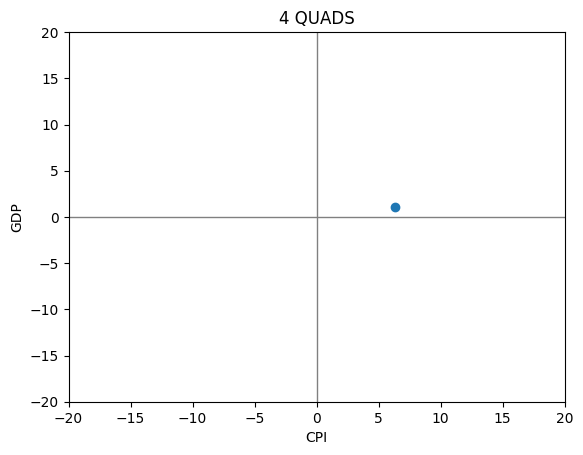

CPI:  [6.32274866]
GDP:  [1.1]
CURRENT CONDITION:  Quad_2: Hawkish


In [42]:
#CREATE QUAD PLOT

#create variables
us_cpi = result_eco['CORESTICKM159SFRBATL'].tail(1)
#us_cpi = us_cpi.values()
us_gdp = result_eco['A191RL1Q225SBEA'].tail(1)
#us_gdp = us_gdp.values()

# Generate some random data
x = us_cpi.values
y = us_gdp.values

# Compute the limits of the plot
xlim = max(-20, 20)
ylim = max(-20, 20)

# Create the plot
fig, ax = plt.subplots()
ax.scatter(x, y)

# Draw horizontal and vertical lines at zero
ax.axhline(0, color='gray', linewidth=1)
ax.axvline(0, color='gray', linewidth=1)

# Set the limits of the plot to be symmetric about zero
ax.set_xlim([-xlim, xlim])
ax.set_ylim([-ylim, ylim])

# Set the title and axis labels
ax.set_title('4 QUADS')
ax.set_xlabel('CPI')
ax.set_ylabel('GDP')

# Display the plot
plt.show()


# 4 QUADS

# 1 GROWING GDP & INFLATION SLOWING

# 2 GROWING GDP & INFLATION GROWING

# 3 SLOWING GDP & INFLATION GROWING

# 4 SLOWING GDP & INFLATION SLOWING


us_cpi = pd.to_numeric(us_cpi.values)
print('CPI: ', us_cpi)
us_gdp = pd.to_numeric(us_gdp.values)
print('GDP: ', us_gdp)

plt.show()
print('CURRENT CONDITION: ', condition)

## SEGREGATE ALL ASSETS INTO ENVIRONMENTS

## IMPORT ASSETS

## JOIN DATA

## SET QUADS AND CRITERIA

In [43]:
Index = df_asset.index

In [44]:
# Create an empty multi-index dataframe to store the conditions for each asset
conditions_df = pd.DataFrame(columns=pd.MultiIndex.from_product([df_asset.columns, ['condition_1', 'condition_2', 'condition_3', 'condition_4']]), index=df_asset.index)

# Loop through each asset in the original dataframe
for asset in df_asset.columns:
    # Define the four conditions for the current asset
    condition_1_data = df_asset[asset][(data['A191RL1Q225SBEA'] > 0) & (data['CORESTICKM159SFRBATL'] < 2)]
    condition_2_data = df_asset[asset][(data['A191RL1Q225SBEA'] > 0) & (data['CORESTICKM159SFRBATL'] > 2)]
    condition_3_data = df_asset[asset][(data['A191RL1Q225SBEA'] < 0) & (data['CORESTICKM159SFRBATL'] < 2)]
    condition_4_data = df_asset[asset][(data['A191RL1Q225SBEA'] < 0) & (data['CORESTICKM159SFRBATL'] > 2)]
    
    
    # Reset the indices of the condition data
    #condition_1_data = condition_1_data.reset_index(drop=True)
    #condition_2_data = condition_2_data.reset_index(drop=True)
    #condition_3_data = condition_3_data.reset_index(drop=True)
    #condition_4_data = condition_4_data.reset_index(drop=True)
    
    # Add a new row to the conditions dataframe with the asset name and the four conditions
    conditions_df.loc[:, (asset, 'condition_1')] = condition_1_data
    conditions_df.loc[:, (asset, 'condition_2')] = condition_2_data
    conditions_df.loc[:, (asset, 'condition_3')] = condition_3_data
    conditions_df.loc[:, (asset, 'condition_4')] = condition_4_data

#"SPY", 'DX-Y.NYB', 'CL=F', 'GBPUSD=X'
# Display the resulting dataframe
#conditions_df['SPY'].plot()

C:\Users\Christopher!\AppData\Local\Temp\ipykernel_15520\2774179622.py:20: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  conditions_df.loc[:, (asset, 'condition_1')] = condition_1_data
C:\Users\Christopher!\AppData\Local\Temp\ipykernel_15520\2774179622.py:21: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  conditions_df.loc[:, (asset, 'condition_2')] = condition_2_data
C:\Users\Christopher!\AppData\Local\Temp\ipykernel_15520\2774179622.py:22: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inp

In [45]:
conditions_df

AAPL                                            ACWI  \
           condition_1 condition_2 condition_3 condition_4 condition_1   
Date                                                                     
1980-01-02         NaN    0.128348         NaN         NaN         NaN   
1980-01-03         NaN    0.128348         NaN         NaN         NaN   
1980-01-04         NaN    0.128348         NaN         NaN         NaN   
1980-01-05         NaN    0.128348         NaN         NaN         NaN   
1980-01-06         NaN    0.128348         NaN         NaN         NaN   
...                ...         ...         ...         ...         ...   
2023-05-18         NaN  175.050003         NaN         NaN         NaN   
2023-05-19         NaN  175.160004         NaN         NaN         NaN   
2023-05-20         NaN  175.160004         NaN         NaN         NaN   
2023-05-21         NaN  175.160004         NaN         NaN         NaN   
2023-05-22         NaN  175.160004         NaN         NaN         NaN   

                                                   ADA-USD              ...  \
           condition_2 condition_3 condition_4 condition_1 condition_2  ...   
Date                                                                    ...   
1980-01-02   50.099998         NaN         NaN         NaN    0.032053  ...   
1980-01-03   50.099998         NaN         NaN         NaN    0.032053  ...   
1980-01-04   50.099998         NaN         NaN         NaN    0.032053  ...   
1980-01-05   50.099998         NaN         NaN         NaN    0.032053  ...   
1980-01-06   50.099998         NaN         NaN         NaN    0.032053  ...   
...                ...         ...         ...         ...         ...  ...   
2023-05-18   92.910004         NaN         NaN         NaN    0.372078  ...   
2023-05-19   92.970001         NaN         NaN         NaN    0.368215  ...   
2023-05-20   92.970001         NaN         NaN         NaN    0.366357  ...   
2023-05-21   92.970001         NaN         NaN         NaN    0.360363  ...   
2023-05-22   92.970001         NaN         NaN         NaN    0.369727  ...   

                  ^TNX                    ^TYX                          \
           condition_3 condition_4 condition_1 condition_2 condition_3   
Date                                                                     
1980-01-02         NaN         NaN         NaN   10.230000         NaN   
1980-01-03         NaN         NaN         NaN   10.310000         NaN   
1980-01-04         NaN         NaN         NaN   10.340000         NaN   
1980-01-05         NaN         NaN         NaN   10.343334         NaN   
1980-01-06         NaN         NaN         NaN   10.346667         NaN   
...                ...         ...         ...         ...         ...   
2023-05-18         NaN         NaN         NaN    3.901000         NaN   
2023-05-19         NaN         NaN         NaN    3.948000         NaN   
2023-05-20         NaN         NaN         NaN    3.948000         NaN   
2023-05-21         NaN         NaN         NaN    3.948000         NaN   
2023-05-22         NaN         NaN         NaN    3.948000         NaN   

                              ^VIX                                      
           condition_4 condition_1 condition_2 condition_3 condition_4  
Date                                                                    
1980-01-02         NaN         NaN   17.240000         NaN         NaN  
1980-01-03         NaN         NaN   17.240000         NaN         NaN  
1980-01-04         NaN         NaN   17.240000         NaN         NaN  
1980-01-05         NaN         NaN   17.240000         NaN         NaN  
1980-01-06         NaN         NaN   17.240000         NaN         NaN  
...                ...         ...         ...         ...         ...  
2023-05-18         NaN         NaN   16.049999         NaN         NaN  
2023-05-19         NaN         NaN   16.809999         NaN         NaN  
2023-05-20         NaN         NaN

# FIND BEST AND WORST PERFOMING ASSET IN CURRENT ENVIRONMENT

C:\Users\Christopher!\AppData\Local\Temp\ipykernel_15520\1629008496.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns_df_cond_1[column] = returns
C:\Users\Christopher!\AppData\Local\Temp\ipykernel_15520\1629008496.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns_df_cond_2[column] = returns
C:\Users\Christopher!\AppData\Local\Temp\ipykernel_15520\1629008496.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.

AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)


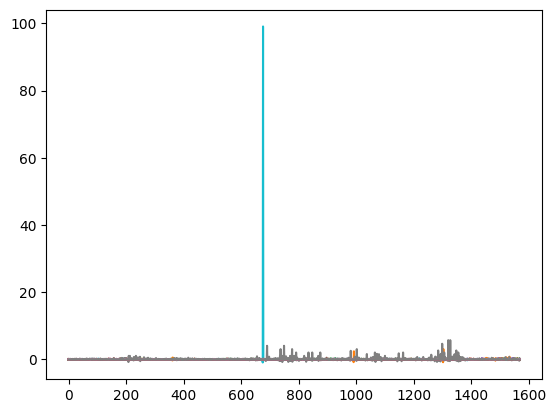

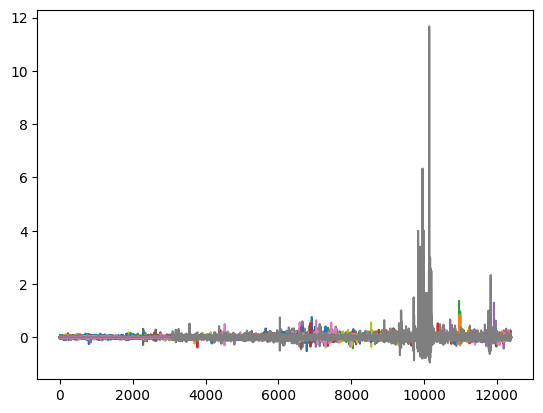

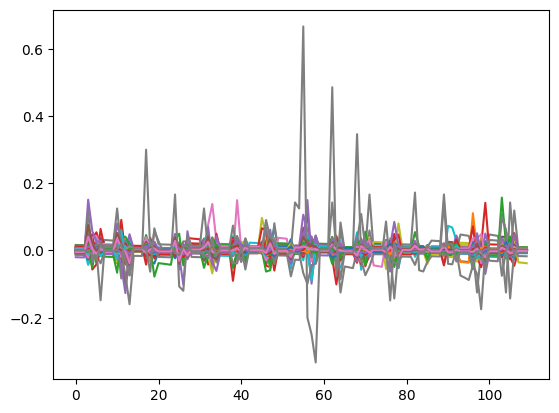

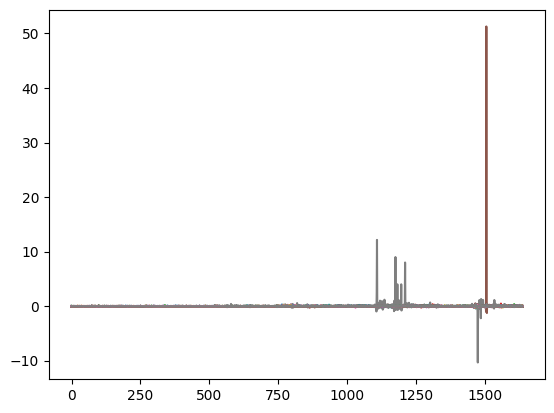

In [52]:
# Create dataframes to store the returns for each condition
returns_df_cond_1 = pd.DataFrame()
returns_df_cond_2 = pd.DataFrame()
returns_df_cond_3 = pd.DataFrame()
returns_df_cond_4 = pd.DataFrame()

# Iterate over the columns in conditions_df
for column in conditions_df.columns:
    # Check the condition number in the column header
    condition_num = column[1]

    # Calculate the returns for the current column
    returns = (conditions_df[column] - conditions_df[column].shift(1)) / conditions_df[column].shift(1)

    # Determine the appropriate dataframe to store the returns
    if condition_num == 'condition_1':
        returns_df_cond_1[column] = returns
    elif condition_num == 'condition_2':
        returns_df_cond_2[column] = returns
    elif condition_num == 'condition_3':
        returns_df_cond_3[column] = returns
    elif condition_num == 'condition_4':
        returns_df_cond_4[column] = returns

# Convert date columns to datetime format
for returns_df in [returns_df_cond_1, returns_df_cond_2, returns_df_cond_3, returns_df_cond_4]:
    returns_df['Date'] = returns_df.index
    returns_df['Date'] = pd.to_datetime(returns_df['Date'])

    # Delete all rows with null data
    returns_df.dropna(inplace=True)

    # Calculate the difference in days between consecutive dates
    returns_df['diff'] = (returns_df['Date'] - returns_df['Date'].shift(1)).dt.days != 1

    # Filter rows where the difference is not equal to 1
    returns_df = returns_df.loc[~returns_df['diff']]

    # Drop the 'Date' and 'diff' columns
    returns_df.drop(['Date', 'diff'], axis=1, inplace=True)

    
    # Reset the index
    returns_df.reset_index(drop=True, inplace=True)
# Drop the 'Date' column from each returns dataframe
returns_df_cond_1 = returns_df_cond_1.drop('Date', axis=1)
returns_df_cond_2 = returns_df_cond_2.drop('Date', axis=1)
returns_df_cond_3 = returns_df_cond_3.drop('Date', axis=1)
returns_df_cond_4 = returns_df_cond_4.drop('Date', axis=1)

# drop diff 
returns_df_cond_1 = returns_df_cond_1.drop('diff', axis=1)
returns_df_cond_2 = returns_df_cond_2.drop('diff', axis=1)
returns_df_cond_3 = returns_df_cond_3.drop('diff', axis=1)
returns_df_cond_4 = returns_df_cond_4.drop('diff', axis=1)

# reset_index
returns_df_cond_1.reset_index(drop=True, inplace=True)
returns_df_cond_2.reset_index(drop=True, inplace=True)
returns_df_cond_3.reset_index(drop=True, inplace=True)
returns_df_cond_4.reset_index(drop=True, inplace=True)

# Print the returns dataframes
print(returns_df_cond_1.plot(legend=False))
print(returns_df_cond_2.plot(legend=False))
print(returns_df_cond_3.plot(legend=False))
print(returns_df_cond_4.plot(legend=False))


In [53]:
returns_df_cond_1

,"(AAPL, condition_1)","(ACWI, condition_1)","(ADA-USD, condition_1)","(AMD, condition_1)","(AMT, condition_1)","(AMZN, condition_1)","(ATVI, condition_1)","(AUDEUR=X, condition_1)","(AUDGBP=X, condition_1)","(AUDJPY=X, condition_1)",...,"(^IXIC, condition_1)","(^MID, condition_1)","(^N225, condition_1)","(^NZ50, condition_1)","(^SPGSCI, condition_1)","(^SSMI, condition_1)","(^STOXX50E, condition_1)","(^TNX, condition_1)","(^TYX, condition_1)","(^VIX, condition_1)"
0,-0.004908,0.000000,0.000000,0.018182,0.000000,-0.005527,0.005274,0.000000,0.001534,0.000000,...,0.006355,0.003734,-0.001305,-0.006157,-0.002480,0.001038,0.000000,-0.001685,-0.003586,-0.025667
1,0.014300,0.000000,0.000000,0.012103,0.010358,0.018869,0.004153,0.000000,-0.000864,0.000000,...,0.009374,0.006948,0.002724,0.000165,-0.010721,0.006294,0.000000,0.006430,0.004066,-0.027046
2,0.014098,0.000000,0.000000,0.011958,0.010252,0.018520,0.004136,0.000000,-0.000865,0.000000,...,0.009287,0.006900,0.002717,0.000165,-0.010837,0.006254,0.000000,0.006389,0.004049,-0.027798
3,0.013902,0.000000,0.000000,0.011817,0.010148,0.018183,0.004119,0.000000,-0.000866,0.000000,...,0.009202,0.006853,0.002710,0.000165,-0.010956,0.006215,0.000000,0.006349,0.004033,-0.028593
4,-0.022223,0.000000,0.000000,0.004595,-0.004566,0.022209,-0.008420,0.000000,0.000662,0.000000,...,-0.002106,0.006592,0.002702,0.001890,0.002528,0.000848,0.000000,-0.009700,-0.006124,-0.041858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564,0.008152,0.001786,0.061753,0.005963,0.005096,-0.000843,-0.001648,-0.000051,0.000359,0.000624,...,0.003500,0.004569,0.000551,0.004439,-0.000210,0.000843,-0.000306,-0.005708,-0.004718,-0.010633
1565,0.008086,0.001783,-0.040025,0.005928,0.005070,-0.000843,-0.001651,-0.000051,0.000359,0.000624,...,0.003488,0.004548,0.000551,0.004419,-0.000210,0.000842,-0.000306,-0.005741,-0.004741,-0.010747
1566,0.008021,0.001780,-0.024184,0.005893,0.005045,-0.000844,-0.001653,-0.000051,0.000359,0.000623,...,0.003475,0.004527,0.000551,0.004400,-0.000210,0.000841,-0.000306,-0.005774,-0.004763,-0.010864
1567,0.012743,-0.000105,0.202618,0.003030,0.019909,0.003303,0.007561,0.000062,0.000413,-0.001580,...,0.000881,-0.013237,0.005178,0.007686,-0.003517,0.007099,0.005515,0.008712,0.009713,-0.011982


<AxesSubplot:>

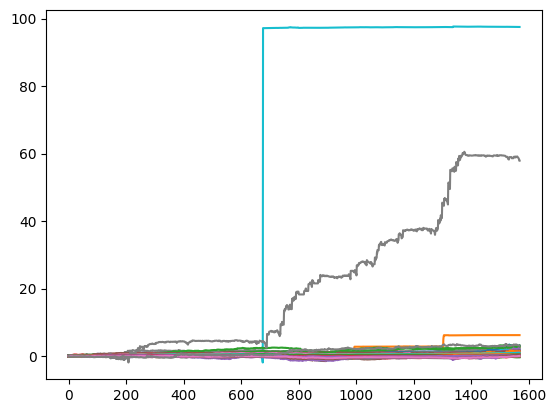

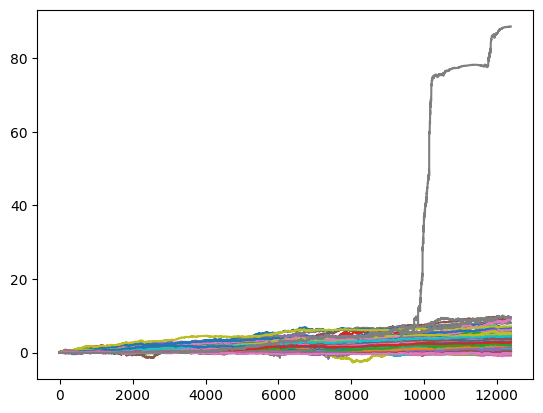

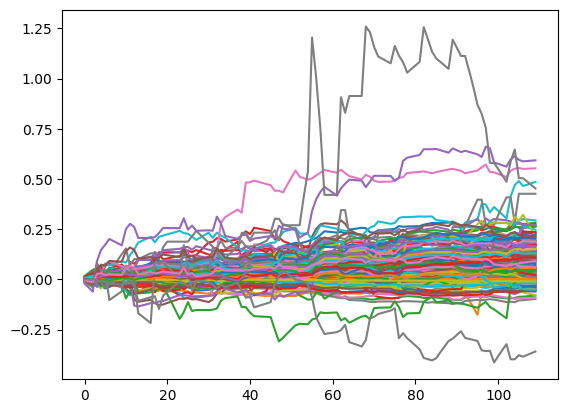

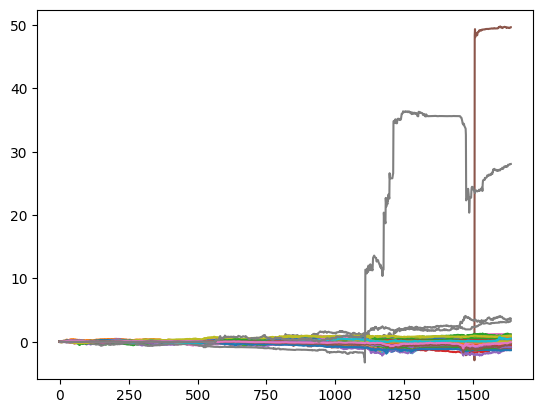

In [55]:
returns_df_perf_cond_1 = np.cumsum(returns_df_cond_1)
returns_df_perf_cond_1.plot(legend=False)

returns_df_perf_cond_2 = np.cumsum(returns_df_cond_2)
returns_df_perf_cond_2.plot(legend=False)

returns_df_perf_cond_3 = np.cumsum(returns_df_cond_3)
returns_df_perf_cond_3.plot(legend=False)

returns_df_perf_cond_4 = np.cumsum(returns_df_cond_4)
returns_df_perf_cond_4.plot(legend=False)

## METRICS FOR ANALYSING HOW EACH ASSET PERFORMEND IN THIS CONDITION

### AVG DAILY RETURN

In [90]:
column_averages_cond_1 = returns_df_cond_1.mean()
column_averages_df_cond_1 = pd.DataFrame(column_averages_cond_1)
column_averages_df_sorted_cond_1 = column_averages_df_cond_1.sort_values(by=0, ascending=False)

# Calculate column averages for cond_2
column_averages_cond_2 = returns_df_cond_2.mean()
column_averages_df_cond_2 = pd.DataFrame(column_averages_cond_2)
column_averages_df_sorted_cond_2 = column_averages_df_cond_2.sort_values(by=0, ascending=False)

# Calculate column averages for cond_3
column_averages_cond_3 = returns_df_cond_3.mean()
column_averages_df_cond_3 = pd.DataFrame(column_averages_cond_3)
column_averages_df_sorted_cond_3 = column_averages_df_cond_3.sort_values(by=0, ascending=False)

# Calculate column averages for cond_4
column_averages_cond_4 = returns_df_cond_4.mean()
column_averages_df_cond_4 = pd.DataFrame(column_averages_cond_4)
column_averages_df_sorted_cond_4 = column_averages_df_cond_4.sort_values(by=0, ascending=False)


column_averages_df_sorted_cond_2[:50]

,0
"(^IRX, condition_2)",0.007156
"(^VIX, condition_2)",0.000774
"(AMZN, condition_2)",0.000765
"(AMD, condition_2)",0.000750
"(NVDA, condition_2)",0.000742
"(AAPL, condition_2)",0.000730
"(ME.TO, condition_2)",0.000655
"(EA, condition_2)",0.000645
"(WMT, condition_2)",0.000576
"(SHW, condition_2)",0.000557


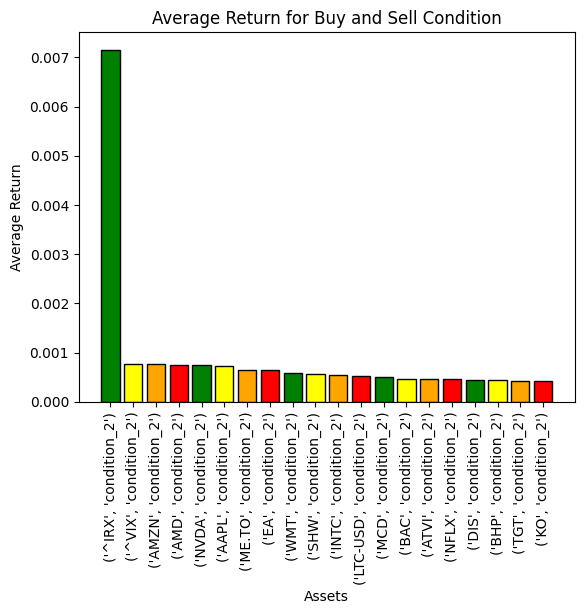

In [64]:
# Convert column names to strings
categories = [str(col) for col in column_averages_df_sorted_cond_2[:20].index]
values = column_averages_df_sorted_cond_2[:20][0]

# Create the plot
plt.bar(categories, values, color=['green', 'yellow', 'orange', 'red'], edgecolor='black')

# Add x-axis ticks and labels
plt.xticks(rotation=90)

# Add a title and labels
plt.title('Average Return for Buy and Sell Condition')
plt.xlabel('Assets')
plt.ylabel('Average Return')

# Display the plot
plt.show()

<AxesSubplot:>

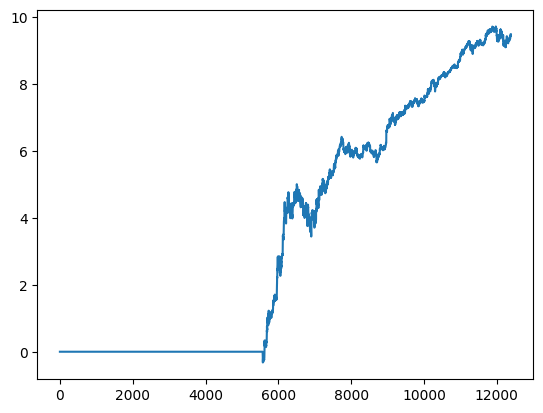

In [89]:
returns_df_perf_cond_2['AMZN', 'condition_2'].plot()

In [91]:
# show how it perfoems in all quads with bar chart


E.G.

# ASSETS PERFORMANCE IN EACH QUAD BAR CHART
# create sample data
categories = ['Quad 1', 'Quad 2', 'Quad 3', 'Quad 4']
values = [quad_1_perf_avg, quad_2_perf_avg, quad_3_perf_avg, quad_4_perf_avg]

# create the plot
plt.bar(categories, values, color=['green', 'yellow', 'orange', 'red'], edgecolor='black')

# add x-axis ticks and labels
plt.xticks(categories)

# add a title
plt.title('Quad Daily AVG Performance in %')

# display the plot
plt.show()
print('CURRENT QUAD: ', current_quad)


### CALMARO RATIO (RET/DRAWDOWN) - NON COMPOUND

In [86]:
# Calculate the CAGR (Compound Annual Growth Rate)
returns_df_cagr = ((returns_df_cond_1.mean() + 1) ** 365) - 1  # Assuming 365 trading days in a year

# Calculate the maximum drawdown
returns_df_drawdown = 1 - returns_df_cond_1.div(returns_df_cond_1.cummax())

# Calculate the Annual% / Max DD%
calmaro_ratio = returns_df_cagr / returns_df_drawdown.max() * 100

# Print the Annual% / Max DD% for each column
calmaro_ratio_df = pd.DataFrame(calmaro_ratio)

calmaro_ratio_df[0] = pd.to_numeric(calmaro_ratio_df[0])
calmaro_ratio_df_sorted = calmaro_ratio_df.sort_values(by=0, ascending=False)

calmaro_ratio_df_sorted
#calmaro_ratio_df_sorted_rounded = calmaro_ratio_df_sorted.round(2)


#calmaro_ratio_df_sorted_rounded[:50]

,0
"(CHFAUD=X, condition_1)",1.571619e+10
"(^IRX, condition_1)",1.505485e+07
"(NFLX, condition_1)",3.121424e+01
"(MSTR, condition_1)",2.685451e+01
"(^VIX, condition_1)",2.450032e+01
...,...
"(BAC, condition_1)",-1.056066e+00
"(ICLN, condition_1)",-1.090071e+00
"(EURUSD=X, condition_1)",-1.304941e+00
"(VNQI, condition_1)",-1.309801e+00


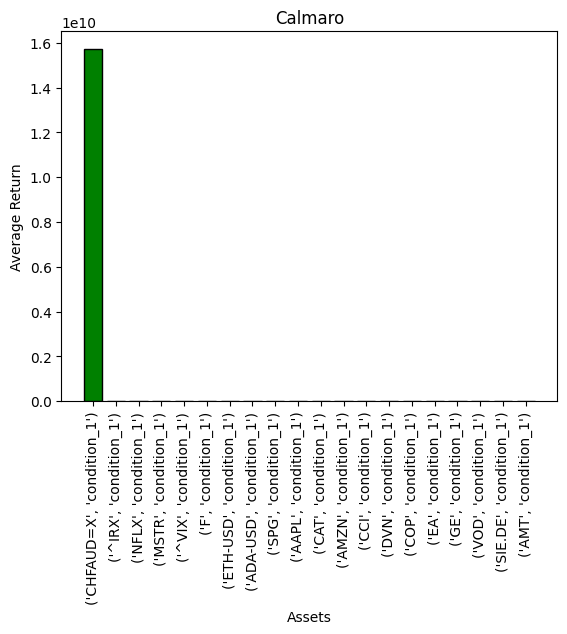

In [88]:
# Convert column names to strings
categories = [str(col) for col in calmaro_ratio_df_sorted[:20].index]
values = calmaro_ratio_df_sorted[0][:20]

# Create the plot
plt.bar(categories, values, color=['green', 'yellow', 'orange', 'red'], edgecolor='black')

# Add x-axis ticks and labels
plt.xticks(rotation=90)

# Add a title and labels
plt.title('Calmaro')
plt.xlabel('Assets')
plt.ylabel('Average Return')

# Display the plot
plt.show()

## PLOT ASSET